In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
colors = {"orange": "#f0ad4e",
          "red": "#d9534f",
          "blue": "#5bc0de",
          "green": "#5cb85c",
          "gray": "#636c72",
          "lightgray": "#d2d2d2"
         }

In [2]:
# elements to remove from text (newline symbol + punctuation)
remove = dict.fromkeys(map(ord, "\n" + string.punctuation))

# import text and store data variable
with open("data-src/words_data.txt", "r") as mytext:
    data = mytext.read().translate(remove)

data

'Four score and seven years ago our fathers brought forth upon this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal Now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure We are met on a great battlefield of that war We have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live It is altogether fitting and proper that we should do this But in a larger sense we cannot dedicate we cannot consecrate we cannot hallow this ground The brave men living and dead who struggled here have consecrated it far above our poor power to add or detract The world will little note nor long remember what we say here but it can never forget what they did here It is for us the living rather to be dedicated here to the unfinished work which they who fought here have thus far so nobly advanced It is rathe

In [3]:
words_list = data.split()
words_length = [len(word) for word in words_list]

# Sampling frame

In [ ]:
#save sampling frame data to csv to be generated as table via d3
sampling_frame = ["{:.0f}: {}".format(i, word) for i,word in enumerate(words_list)]
pd.DataFrame(np.concatenate([sampling_frame, ["-" for i in range(2)]]).reshape((27,10))).to_csv("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/d3-anim/js-graphs/js-graphs-data-src/words-sampling-frame.csv",
                                                              index=False, header=False)

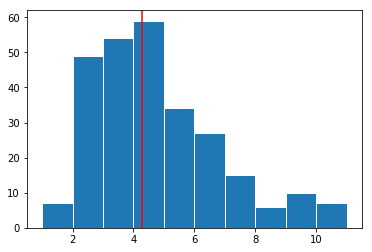

In [6]:
plt.hist(words_length, bins=10, ec="w");
plt.axvline(np.mean(words_length), color="red")

In [5]:
print("Mean words length: {0:.2f}\nMedian words length: {1:.2f}".format(np.mean(words_length), np.median(words_length)))

Mean words length: 4.29
Median words length: 4.00


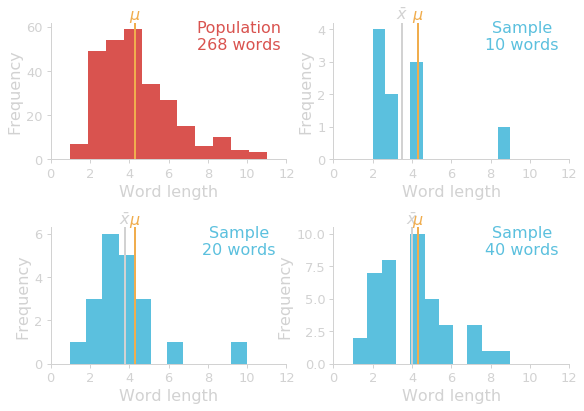

In [69]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

for ax in [ax1]:
    ax.set_xlim(0, 12)
    ax.hist(words_length, bins=11, color=colors["red"])
    ax.text(0.8*ax.get_xlim()[1], 0.8*ax.get_ylim()[1], "Population\n268 words", size=16, color=colors["red"], ha="center")

for size,ax in zip([10, 20, 40], [ax2, ax3, ax4]):
    ax.set_xlim(0, 12)
    sample = np.random.choice(words_list, replace=False, size=size)
    sample_lengths = [len(word) for word in sample]
    ax.hist(sample_lengths, bins=11, color=colors["blue"])
    ax.text(0.8*ax.get_xlim()[1], 0.8*ax.get_ylim()[1], "Sample\n{} words".format(size), size=16, color=colors["blue"], ha="center")
    ax.axvline(np.mean(sample_lengths), color=colors["lightgray"], lw=2)
    ax.text(np.mean(sample_lengths), 1.02*ax.get_ylim()[1], r"$\bar{x}$", size=16, color=colors["lightgray"], ha="center")



for ax in [ax1, ax2, ax3, ax4]:
    for spine in ["bottom", "left"]:
        ax.spines[spine].set_linewidth(1)
        ax.spines[spine].set_color(colors["lightgray"])
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)
    ax.set_xlim(0, 12)
    ax.set_ylim(0)
    ax.set_xlabel("Word length", size=16, color=colors["lightgray"])
    ax.tick_params(axis="both", width=1, size=4, color=colors["lightgray"], labelcolor=colors["lightgray"], 
                   labelsize=13, pad=4)
    ax.set_ylabel("Frequency", size=16, color=colors["lightgray"])
    ax.axvline(np.mean(words_length), color=colors["orange"], lw=2)
    ax.text(np.mean(words_length), 1.02*ax.get_ylim()[1], "$\mu$", size=16, color=colors["orange"], ha="center")

#plt.tight_layout()
plt.subplots_adjust(left=0.08, bottom=0.17, right=0.98, top=0.96,
                wspace=0.2, hspace=0.5)

plt.savefig("/Users/Gui/Box Sync/_STATS13/_Slides/_stats13-Lectures/assets/img/lec/sampling-words-samples.svg", transparent=True)

In [6]:
n_simul = 40
res_mean = np.zeros(n_simul)
res_median = np.zeros(n_simul)
for i in range(n_simul):
    idx = np.random.randint(0, len(words_list), size=10) #10 random indices
    sample_length = [len(words_list[j]) for j in idx]
    res_mean[i] = np.mean(sample_length)
    res_median[i] = np.median(sample_length)

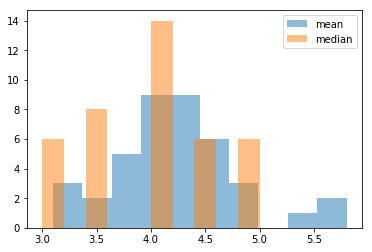

In [7]:
plt.hist(res_mean, alpha=0.5, label="mean")
plt.hist(res_median, alpha=0.5, label="median")
plt.legend();